In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tf-keras

In [ ]:
pip install tensorflow-model-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 6.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import tf_keras as keras
from tf_keras.models import Model
from tf_keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation, SeparableConv2D
import pandas as pd
import numpy as np
import tensorflow_model_optimization as tfmot

In [ ]:
img_size = 224
batch_size = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_igen = ImageDataGenerator(rescale  = 1./255,
                             zoom_range = .1,
                            horizontal_flip=True,
                            brightness_range= (0.8,1.2),
                            validation_split = .2)
test_igen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = '/content/drive/MyDrive/ai_real_images/train'
test_dir = '/content/drive/MyDrive/ai_real_images/test'

In [ ]:
train_datagen = train_igen.flow_from_directory(train_dir, target_size = (img_size, img_size),
                                               batch_size = batch_size, shuffle = True,
                                               class_mode = 'categorical', subset = 'training')
valid_datagen = train_igen.flow_from_directory(train_dir, target_size = (img_size, img_size), batch_size = batch_size, shuffle = True,
                                               class_mode = 'categorical', subset = 'validation')
test_datagen = test_igen.flow_from_directory(test_dir, target_size = (img_size, img_size),
                                             batch_size = batch_size, shuffle = True, class_mode = 'categorical')

Found 5596 images belonging to 2 classes.
Found 1398 images belonging to 2 classes.
Found 1300 images belonging to 2 classes.


In [ ]:
pruning_params = {
    'sparsity_m_by_n': (2, 4)
}

In [ ]:
input = Input(shape=(img_size, img_size, 3))
vgg_block1 = SeparableConv2D(64, (3, 3), padding='same')(input)
vgg_block1 = BatchNormalization()(vgg_block1)
vgg_block1 = Activation('elu')(vgg_block1)
vgg_block1 = SeparableConv2D(64, (3, 3), padding='SAME')(vgg_block1)
vgg_block1 = BatchNormalization()(vgg_block1)
vgg_block1 = Activation('elu')(vgg_block1)
vgg_block1 = MaxPooling2D((2, 2))(vgg_block1)  # 112*112*64

vgg_block2 = SeparableConv2D(128, (3, 3), padding='SAME')(vgg_block1)
vgg_block2 = BatchNormalization()(vgg_block2)
vgg_block2 = Activation('elu')(vgg_block2)
vgg_block2 = SeparableConv2D(128, (3, 3), padding='SAME')(vgg_block2)
vgg_block2 = BatchNormalization()(vgg_block2)
vgg_block2 = Activation('elu')(vgg_block2)
vgg_block2 = MaxPooling2D((2, 2))(vgg_block2)  # 56*56*128

vgg_block3 = SeparableConv2D(256, (3, 3), padding='SAME')(vgg_block2)
vgg_block3 = BatchNormalization()(vgg_block3)
vgg_block3 = Activation('elu')(vgg_block3)
vgg_block3 = SeparableConv2D(256, (3, 3), padding='SAME')(vgg_block3)
vgg_block3 = BatchNormalization()(vgg_block3)
vgg_block3 = Activation('elu')(vgg_block3)
vgg_block3 = SeparableConv2D(256, (3, 3), padding='SAME')(vgg_block3)
vgg_block3 = BatchNormalization()(vgg_block3)
vgg_block3 = Activation('elu')(vgg_block3)
vgg_block3 = SeparableConv2D(256, (3, 3), padding='SAME')(vgg_block3)
vgg_block3 = BatchNormalization()(vgg_block3)
vgg_block3 = Activation('elu')(vgg_block3)
vgg_block3 = MaxPooling2D((2, 2))(vgg_block3)  # 28*28*256

vgg_block4 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block3)
vgg_block4 = BatchNormalization()(vgg_block4)
vgg_block4 = Activation('elu')(vgg_block4)
vgg_block4 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block4)
vgg_block4 = BatchNormalization()(vgg_block4)
vgg_block4 = Activation('elu')(vgg_block4)
vgg_block4 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block4)
vgg_block4 = BatchNormalization()(vgg_block4)
vgg_block4 = Activation('elu')(vgg_block4)
vgg_block4 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block4)
vgg_block4 = BatchNormalization()(vgg_block4)
vgg_block4 = Activation('elu')(vgg_block4)
vgg_block4 = MaxPooling2D((2, 2))(vgg_block4)  # 14*14*512

vgg_block5 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block4)
vgg_block5 = BatchNormalization()(vgg_block5)
vgg_block5 = Activation('elu')(vgg_block5)
vgg_block5 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block5)
vgg_block5 = BatchNormalization()(vgg_block5)
vgg_block5 = Activation('elu')(vgg_block5)
vgg_block5 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block5)
vgg_block5 = BatchNormalization()(vgg_block5)
vgg_block5 = Activation('elu')(vgg_block5)
vgg_block5 = SeparableConv2D(512, (3, 3), padding='SAME')(vgg_block5)
vgg_block5 = BatchNormalization()(vgg_block5)
vgg_block5 = Activation('elu')(vgg_block5)
vgg_block5 = MaxPooling2D((2, 2))(vgg_block5)  # 7*7*512

flatten = Flatten()(vgg_block5)

dense1 = Dense(4096, activation='relu')(flatten)
dropout1 = Dropout(0.2)(dense1)
dense2 = Dense(4096, activation='relu')(dropout1)
dropout2 = Dropout(0.2)(dense2)
output = Dense(2, activation='softmax')(dropout2)

model = Model(inputs=input, outputs=output)

In [ ]:
model_for_pruning = tfmot.sparsity.keras.prune_low_magnitude(model, **pruning_params)

In [ ]:
model_for_pruning.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

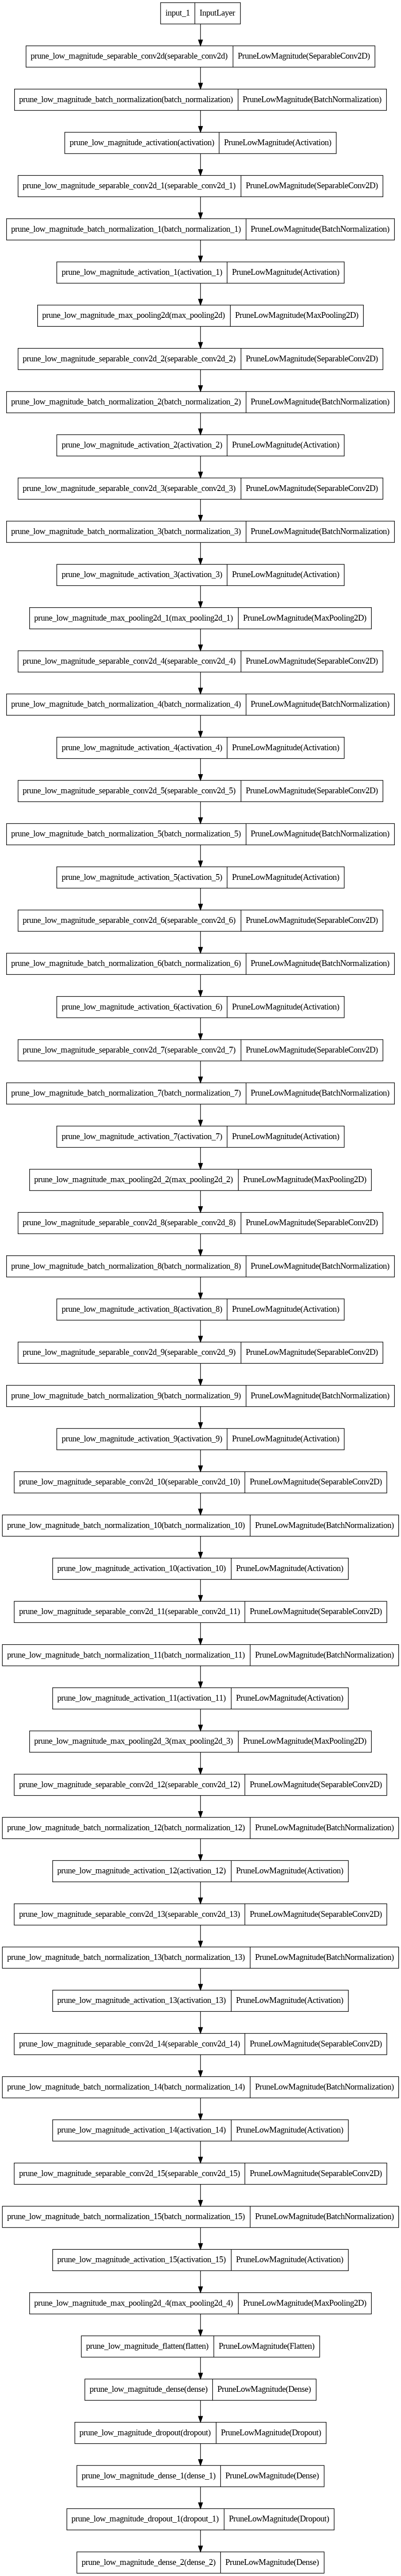

In [ ]:
keras.utils.plot_model(model_for_pruning)

In [ ]:
steps_per_epoch = 174
validation_steps = 43

In [ ]:
callbacks = [
    tfmot.sparsity.keras.UpdatePruningStep(),
    tfmot.sparsity.keras.PruningSummaries(log_dir='/tmp/pruning_logs')
]

In [ ]:
history = model_for_pruning.fit(train_datagen,
                                  validation_data=valid_datagen,
                                  epochs=40,
                                  batch_size=batch_size,
                                  steps_per_epoch=steps_per_epoch,
                                  validation_steps=validation_steps,
                                  callbacks=callbacks)

Epoch 1/40
 34/174 [====>.........................] - ETA: 12:27 - loss: 0.8013 - accuracy: 0.6388

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


174/174 [==============================] - 1084s 6s/step - loss: 0.6160 - accuracy: 0.7214 - val_loss: 0.6940 - val_accuracy: 0.4847
Epoch 2/40
174/174 [==============================] - 196s 1s/step - loss: 0.4309 - accuracy: 0.8122 - val_loss: 0.7013 - val_accuracy: 0.4811
Epoch 3/40
174/174 [==============================] - 193s 1s/step - loss: 0.4051 - accuracy: 0.8266 - val_loss: 1.0075 - val_accuracy: 0.4782
Epoch 4/40
174/174 [==============================] - 194s 1s/step - loss: 0.3692 - accuracy: 0.8382 - val_loss: 1.6317 - val_accuracy: 0.4826
Epoch 5/40
174/174 [==============================] - 229s 1s/step - loss: 0.3471 - accuracy: 0.8449 - val_loss: 0.4378 - val_accuracy: 0.8081
Epoch 6/40
174/174 [==============================] - 176s 1s/step - loss: 0.3284 - accuracy: 0.8575 - val_loss: 0.4629 - val_accuracy: 0.8096
Epoch 7/40
174/174 [==============================] - 175s 1s/step - loss: 0.3161 - accuracy: 0.8713 - val_loss: 0.2733 - val_accuracy: 0.8837
Epoch 8/4

In [ ]:
final_model = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

In [ ]:
final_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 separable_conv2d (Separabl  (None, 224, 224, 64)      283       
 eConv2D)                                                        
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 separable_conv2d_1 (Separa  (None, 224, 224, 64)      4736      
 bleConv2D)                                                      
                                                             

In [ ]:
final_model.evaluate(test_datagen, steps=41)

41/41 [==============================] - 630s 16s/step - loss: 1.4702 - accuracy: 0.7731


[1.4702471494674683, 0.7730769515037537]

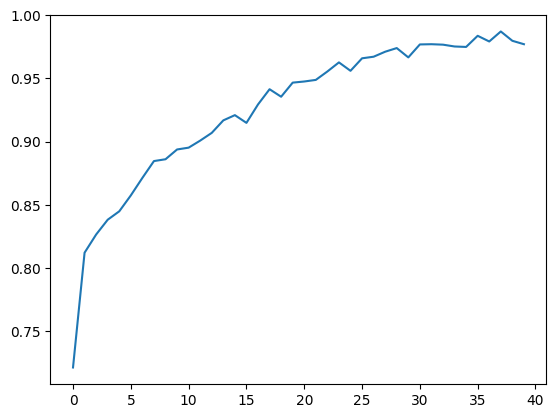

In [ ]:
plt.plot(history.history['accuracy'])

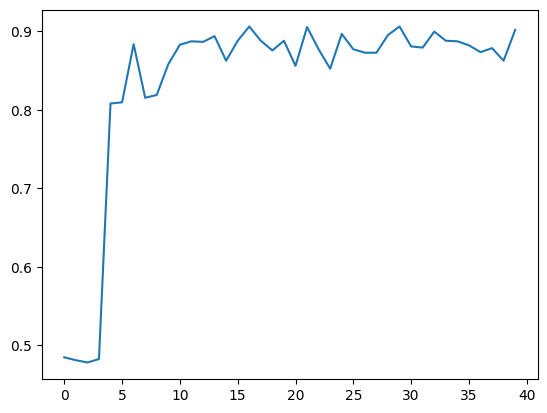

In [ ]:
plt.plot(history.history['val_accuracy'])

In [ ]:
final_model.evaluate(test_datagen, steps=41)

41/41 [==============================] - 49s 1s/step - loss: 1.4437 - accuracy: 0.7785


[1.443745732307434, 0.7784615159034729]

In [ ]:
final_model.save('sep_struc_pruning_model_05.h5')

/usr/local/lib/python3.10/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!cp /content/sep_struc_pruning_model_05.h5 /content/drive/MyDrive/model/sep_struc_pruning_model_05.h5

In [ ]:
model_for_pruning.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 prune_low_magnitude_separa  (None, 224, 224, 64)      477       
 ble_conv2d (PruneLowMagnit                                      
 ude)                                                            
                                                                 
 prune_low_magnitude_batch_  (None, 224, 224, 64)      257       
 normalization (PruneLowMag                                      
 nitude)                                                         
                                                                 
 prune_low_magnitude_activa  (None, 224, 224, 64)      1         
 tion (PruneLowMagnitude)                                        
                                                             

Shape of the weight matrix: (3, 3, 3, 1)


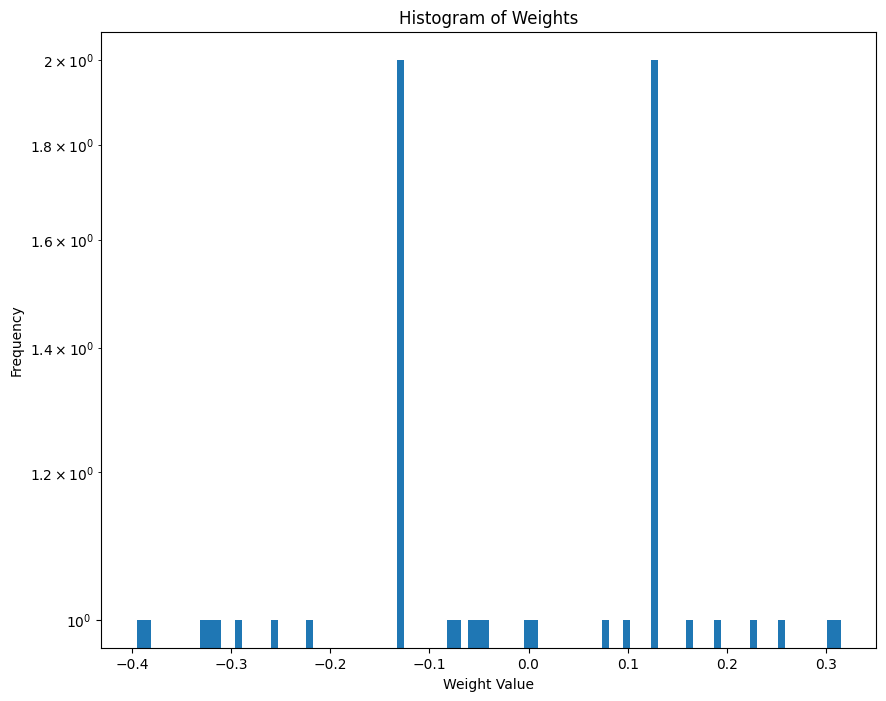

In [ ]:
layer = model_for_pruning.get_layer('prune_low_magnitude_separable_conv2d')
weights = layer.get_weights()[0]

print(f"Shape of the weight matrix: {weights.shape}")

plt.figure(figsize=(10, 8))
plt.hist(weights.flatten(), bins=100)
plt.yscale('log')
plt.title('Histogram of Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()

def check_sparsity_pattern(weights, m=2, n=4):
    non_zero_counts = np.sum(weights != 0, axis=-1)
    is_correct_pattern = np.all(non_zero_counts <= m)
    return is_correct_pattern

Shape of the weight matrix: (3, 3, 64, 1)


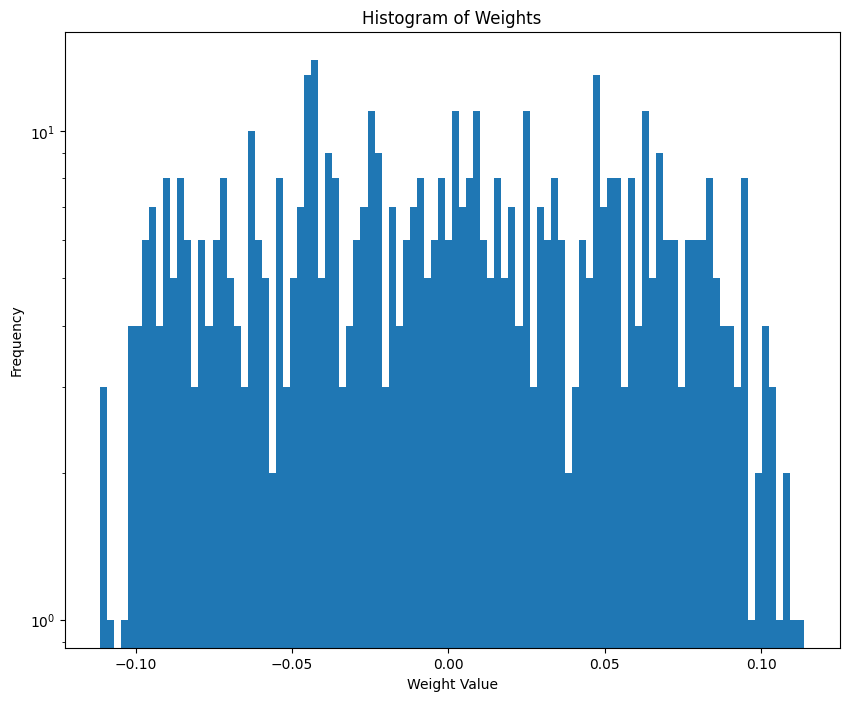

In [ ]:
layer = model_for_pruning.get_layer('prune_low_magnitude_separable_conv2d_1')
weights = layer.get_weights()[0]

print(f"Shape of the weight matrix: {weights.shape}")

plt.figure(figsize=(10, 8))
plt.hist(weights.flatten(), bins=100)
plt.yscale('log')
plt.title('Histogram of Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()

def check_sparsity_pattern(weights, m=2, n=4):
    non_zero_counts = np.sum(weights != 0, axis=-1)
    is_correct_pattern = np.all(non_zero_counts <= m)
    return is_correct_pattern

In [ ]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 separable_conv2d (Separabl  (None, 224, 224, 64)      283       
 eConv2D)                                                        
                                                                 
 batch_normalization (Batch  (None, 224, 224, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 separable_conv2d_1 (Separa  (None, 224, 224, 64)      4736      
 bleConv2D)                                                      
                                                             

Shape of the weight matrix: (3, 3, 3, 1)


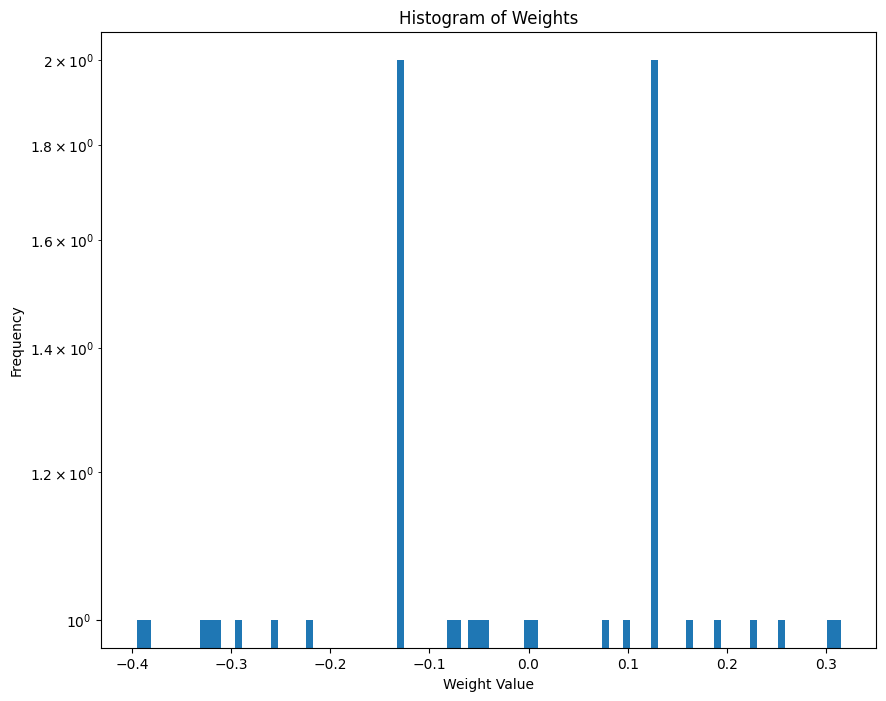

In [ ]:
layer = final_model.get_layer('separable_conv2d')
weights = layer.get_weights()[0]

print(f"Shape of the weight matrix: {weights.shape}")

plt.figure(figsize=(10, 8))
plt.hist(weights.flatten(), bins=100)
plt.yscale('log')
plt.title('Histogram of Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()

def check_sparsity_pattern(weights, m=2, n=4):
    non_zero_counts = np.sum(weights != 0, axis=-1)
    is_correct_pattern = np.all(non_zero_counts <= m)
    return is_correct_pattern

Shape of the weight matrix: (3, 3, 64, 1)


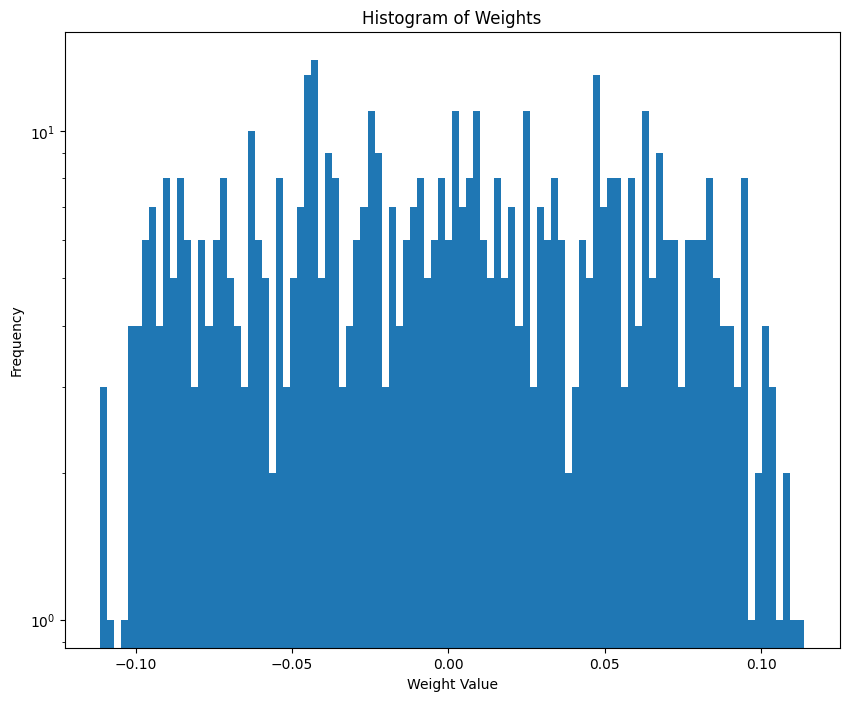

In [ ]:
layer = final_model.get_layer('separable_conv2d_1')
weights = layer.get_weights()[0]

print(f"Shape of the weight matrix: {weights.shape}")

plt.figure(figsize=(10, 8))
plt.hist(weights.flatten(), bins=100)
plt.yscale('log')
plt.title('Histogram of Weights')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()

def check_sparsity_pattern(weights, m=2, n=4):
    non_zero_counts = np.sum(weights != 0, axis=-1)
    is_correct_pattern = np.all(non_zero_counts <= m)
    return is_correct_pattern